In [2]:
import  pandas as pd 

In [5]:
df = pd.read_excel("sizes_comm.xlsx")
display(df)

,Length,Width,Height
0,101,101,95
1,101,101,115
2,101,101,130
3,115,115,140
4,100,100,142
...,...,...,...
249,85,85,190
250,88,88,146
251,90,90,196
252,90,90,325


In [9]:
print(df.head)
print(df.describe)
df.sum().isnull()

<bound method NDFrame.head of      Length  Width  Height
0       101    101      95
1       101    101     115
2       101    101     130
3       115    115     140
4       100    100     142
..      ...    ...     ...
249      85     85     190
250      88     88     146
251      90     90     196
252      90     90     325
253      91     91     350

[254 rows x 3 columns]>
<bound method NDFrame.describe of      Length  Width  Height
0       101    101      95
1       101    101     115
2       101    101     130
3       115    115     140
4       100    100     142
..      ...    ...     ...
249      85     85     190
250      88     88     146
251      90     90     196
252      90     90     325
253      91     91     350

[254 rows x 3 columns]>


Length    False
Width     False
Height    False
dtype: bool

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
inertia = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

AttributeError: module 'matplotlib.pyplot' has no attribute 'Grid'

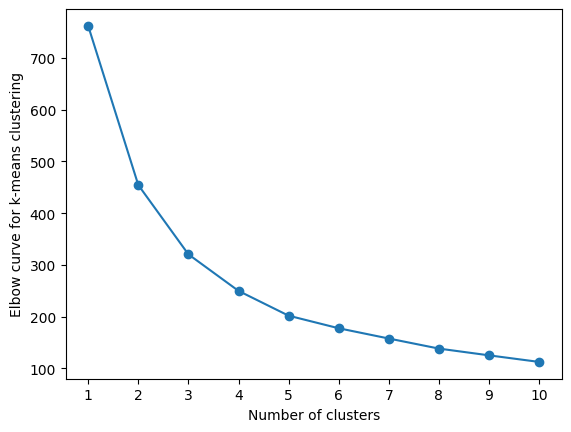

In [19]:
plt.Figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow curve for k-means clustering')
plt.xticks(k_range)
plt.Grid(True)
plt.show()

In [26]:
# Example with K=3 (replace with your optimal K)
optimal_k = 50
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Convert centers back to original scale
df['cluster'] = df['cluster'].astype('category')

# Print cluster centers
print("Cluster centers (original scale):\n", cluster_centers)
print("\nCluster distribution:\n", df['cluster'].value_counts())

Cluster centers (original scale):
 [[ 326.57142857  238.42857143  210.85714286]
 [ 264.16666667  264.16666667  397.5       ]
 [ 405.66666667  275.66666667  234.66666667]
 [ 161.375       161.375       298.375     ]
 [ 645.          400.          385.        ]
 [ 403.75        396.25        640.        ]
 [  96.           96.          146.81818182]
 [ 115.22222222  115.22222222  372.11111111]
 [ 486.          132.         1144.        ]
 [ 557.          254.          384.        ]
 [ 268.5         262.2         527.2       ]
 [ 583.83333333  453.83333333  332.5       ]
 [ 334.          333.28571429  360.42857143]
 [ 158.6         158.6         524.2       ]
 [ 480.          204.5         285.        ]
 [ 367.33333333  256.33333333  146.33333333]
 [ 452.85714286  365.          250.71428571]
 [ 600.          600.          400.        ]
 [ 164.          144.          125.        ]
 [ 215.2         211.1         416.2       ]
 [ 314.6         310.1         462.7       ]
 [ 330.2         320

c:\Users\458774\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Assuming you have already performed K-means clustering and stored the cluster labels in 'df['cluster']'

# Add an index to identify the cluster group
cluster_labels = df['cluster'].astype('category')
cluster_labels.cat.rename_categories(['Cluster ' + str(cat) for cat in cluster_labels.cat.categories], inplace=True)

# Update the 'cluster' column in your DataFrame
df['cluster'] = cluster_labels

# Print cluster distribution with labels
print("Cluster centers (original scale):\n", cluster_centers)
print("Cluster distribution with labels:\n", df['cluster'].value_counts())

Cluster centers (original scale):
 [[ 326.57142857  238.42857143  210.85714286]
 [ 264.16666667  264.16666667  397.5       ]
 [ 405.66666667  275.66666667  234.66666667]
 [ 161.375       161.375       298.375     ]
 [ 645.          400.          385.        ]
 [ 403.75        396.25        640.        ]
 [  96.           96.          146.81818182]
 [ 115.22222222  115.22222222  372.11111111]
 [ 486.          132.         1144.        ]
 [ 557.          254.          384.        ]
 [ 268.5         262.2         527.2       ]
 [ 583.83333333  453.83333333  332.5       ]
 [ 334.          333.28571429  360.42857143]
 [ 158.6         158.6         524.2       ]
 [ 480.          204.5         285.        ]
 [ 367.33333333  256.33333333  146.33333333]
 [ 452.85714286  365.          250.71428571]
 [ 600.          600.          400.        ]
 [ 164.          144.          125.        ]
 [ 215.2         211.1         416.2       ]
 [ 314.6         310.1         462.7       ]
 [ 330.2         320

C:\Users\458774\AppData\Local\Temp\ipykernel_10852\1558303120.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  cluster_labels.cat.rename_categories(['Cluster ' + str(cat) for cat in cluster_labels.cat.categories], inplace=True)


In [30]:
# Convert cluster centers back to DataFrame and add labels
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Length', 'Width', 'Height'])
cluster_centers_df.index = ['Cluster ' + str(i+1) for i in range(len(cluster_centers))]

# Print cluster centers with labels
print("Cluster centers with labels:\n", cluster_centers_df)
print("Cluster distribution with labels:\n", df['cluster'].value_counts())

Cluster centers with labels:
                 Length       Width       Height
Cluster 1   326.571429  238.428571   210.857143
Cluster 2   264.166667  264.166667   397.500000
Cluster 3   405.666667  275.666667   234.666667
Cluster 4   161.375000  161.375000   298.375000
Cluster 5   645.000000  400.000000   385.000000
Cluster 6   403.750000  396.250000   640.000000
Cluster 7    96.000000   96.000000   146.818182
Cluster 8   115.222222  115.222222   372.111111
Cluster 9   486.000000  132.000000  1144.000000
Cluster 10  557.000000  254.000000   384.000000
Cluster 11  268.500000  262.200000   527.200000
Cluster 12  583.833333  453.833333   332.500000
Cluster 13  334.000000  333.285714   360.428571
Cluster 14  158.600000  158.600000   524.200000
Cluster 15  480.000000  204.500000   285.000000
Cluster 16  367.333333  256.333333   146.333333
Cluster 17  452.857143  365.000000   250.714286
Cluster 18  600.000000  600.000000   400.000000
Cluster 19  164.000000  144.000000   125.000000
Cluster 20

In [47]:
display(cluster_centers_df)

,Length,Width,Height
Cluster 1,326.571429,238.428571,210.857143
Cluster 2,264.166667,264.166667,397.500000
Cluster 3,405.666667,275.666667,234.666667
Cluster 4,161.375000,161.375000,298.375000
Cluster 5,645.000000,400.000000,385.000000
Cluster 6,403.750000,396.250000,640.000000
Cluster 7,96.000000,96.000000,146.818182
Cluster 8,115.222222,115.222222,372.111111
Cluster 9,486.000000,132.000000,1144.000000
Cluster 10,557.000000,254.000000,384.000000


In [51]:
cluster_centers_df.to_excel("clusters.xlsx")